In [1]:
import requests

url = 'http://api.openweathermap.org/data/2.5/group?id=1668341,1668399,1670481&units=metric&appid=29c4f184354b9889e87f7b494ac86aed'

response = requests.get(url)
if response.status_code == 200:
    print("下載成功")

allData = response.json()
print(allData)

下載成功
{'cnt': 3, 'list': [{'coord': {'lon': 121.5319, 'lat': 25.0478}, 'sys': {'country': 'TW', 'timezone': 28800, 'sunrise': 1664574338, 'sunset': 1664617297}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'main': {'temp': 32.56, 'feels_like': 34.18, 'temp_min': 30.03, 'temp_max': 33.93, 'pressure': 1013, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1664608175, 'id': 1668341, 'name': 'Taipei'}, {'coord': {'lon': 120.6839, 'lat': 24.1469}, 'sys': {'country': 'TW', 'timezone': 28800, 'sunrise': 1664574529, 'sunset': 1664617513}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'main': {'temp': 32.56, 'feels_like': 38.42, 'temp_min': 30.58, 'temp_max': 34.16, 'pressure': 998, 'humidity': 60}, 'visibility': 8000, 'wind': {'speed': 3.09, 'deg': 350}, 'clouds': {'all': 40}, 'dt': 1664608175, 'id': 1668399, 'name': 'Taichung'}, {'coord': {'lon': 120.4

In [3]:
cities_dic = {}
for city in allData['list']:
    print(city['name'])
    print(city['main']['temp'])
    print("===============")
    cities_dic[city['name']] =  city['main']['temp']

cities_dic

Taipei
32.56
Taichung
32.56
Pingtung City
30.65


{'Taipei': 32.56, 'Taichung': 32.56, 'Pingtung City': 30.65}

In [6]:
#儲存為excel
from openpyxl import Workbook
wb = Workbook()
ws = wb.active
city_names = list(cities_dic.keys())
city_temps = list(cities_dic.values())
ws.append(city_names)
ws.append(city_temps)
wb.save("目前天氣.xlsx")

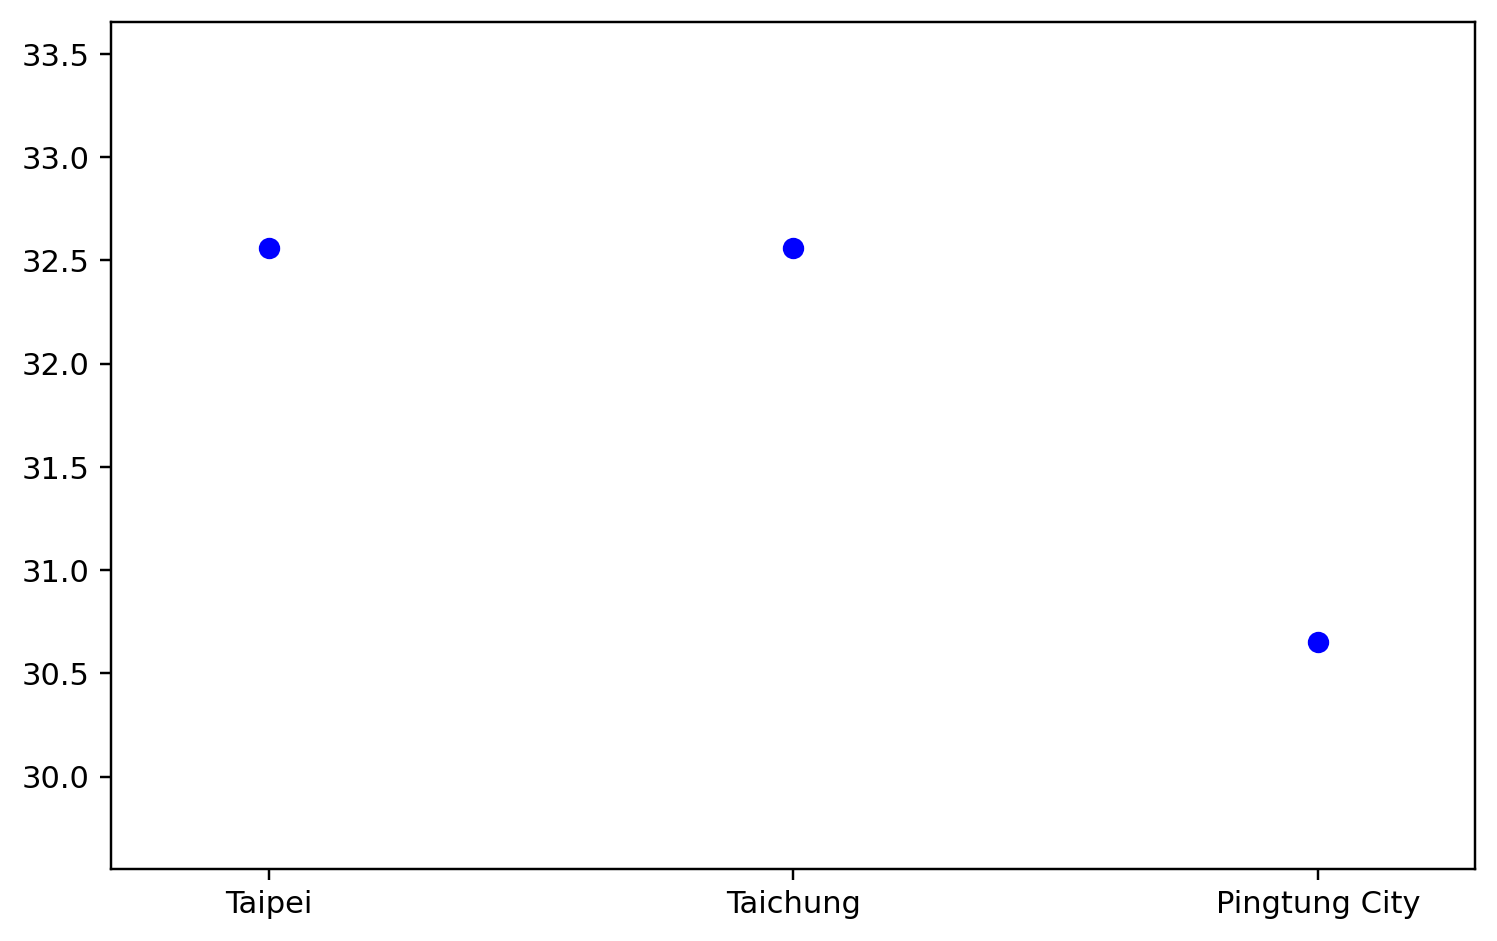

In [10]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8,5),dpi=220)
axes = figure.add_subplot(1,1,1)
axes.plot(city_names,city_temps,'bo')
xmin, xmax, ymin, ymax = axes.axis()
xmin -= 0.2
xmax += 0.2
ymin -= 1
ymax += 1
axes.axis(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
plt.show()